# Customer Churn Prediction using Machine Learning

## Objective
### To predict which customers are likely to churn and identify the key drivers of churn, enabling businesses to take proactive retention actions.

## Step 1 - Import Libraries and Load Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

In [3]:
train_df = pd.read_csv("customer_churn_dataset-training-master.csv")
test_df = pd.read_csv("customer_churn_dataset-testing-master.csv")

## Step 2 - Dataset Overview

In [4]:
train_df

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
440828,449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
440829,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440830,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440831,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0


In [5]:
train_df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [6]:
test_df

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...
64369,64370,45,Female,33,12,6,21,Basic,Quarterly,947,14,1
64370,64371,37,Male,6,1,5,22,Standard,Annual,923,9,1
64371,64372,25,Male,39,14,8,30,Premium,Monthly,327,20,1
64372,64373,50,Female,18,19,7,22,Standard,Monthly,540,13,1


In [7]:
test_df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [8]:
train_df.shape

(440833, 12)

In [9]:
test_df.shape

(64374, 12)

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [11]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB


## Step 3 - Exploratory Data Analysis (EDA)

### Step 3.1 - Churn Distribution

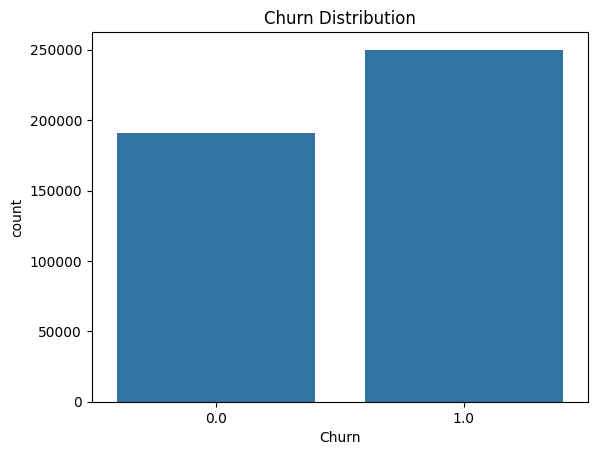

In [12]:
sns.countplot(x = "Churn", data = train_df)
plt.title("Churn Distribution")
plt.show()

### Step 3.2 - Correlation Analysis

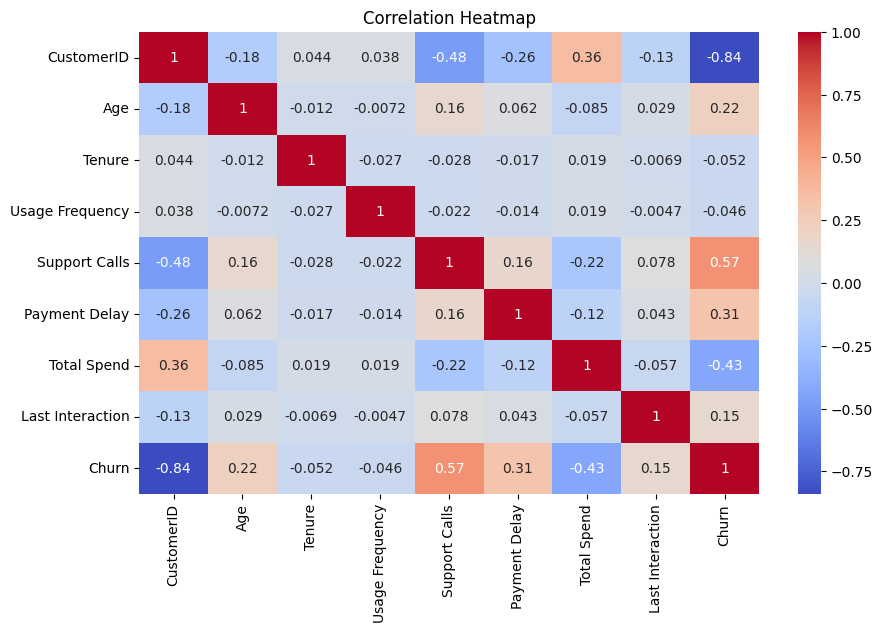

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(train_df.corr(numeric_only = True), cmap='coolwarm', annot = True)
plt.title("Correlation Heatmap")
plt.show()

### Step 3.3 - Feature Distributions vs Churn

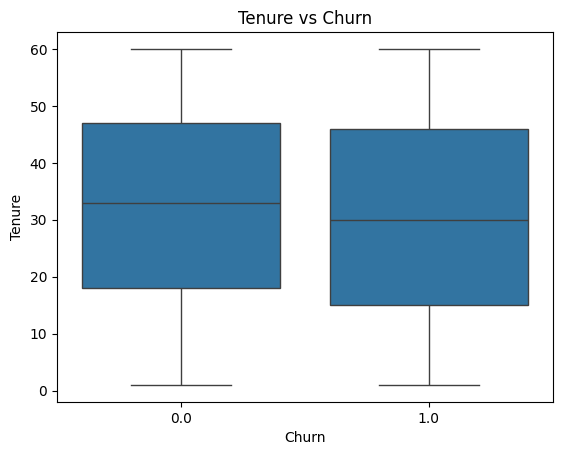

In [14]:
sns.boxplot(x = "Churn", y = "Tenure", data = train_df)
plt.title("Tenure vs Churn")
plt.show()

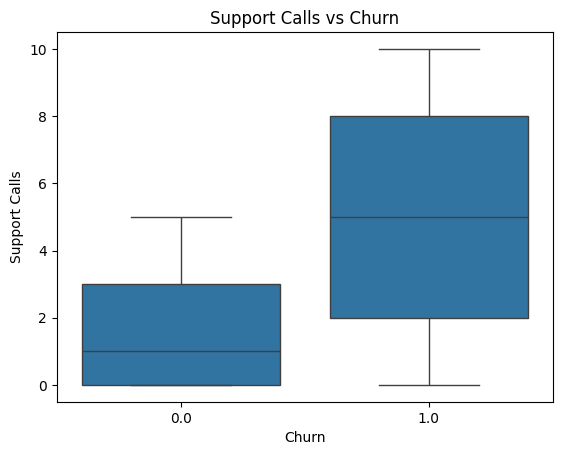

In [15]:
sns.boxplot(x='Churn', y='Support Calls', data = train_df)
plt.title("Support Calls vs Churn")
plt.show()

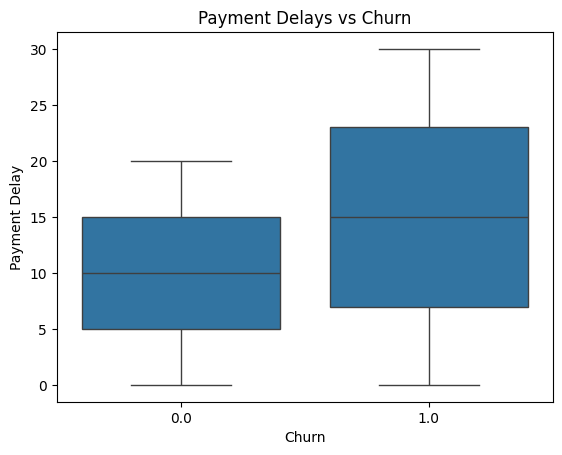

In [16]:
sns.boxplot(x='Churn', y='Payment Delay', data = train_df)
plt.title("Payment Delays vs Churn")
plt.show()

### Step 3.4 - Churn Rate by Contract Length

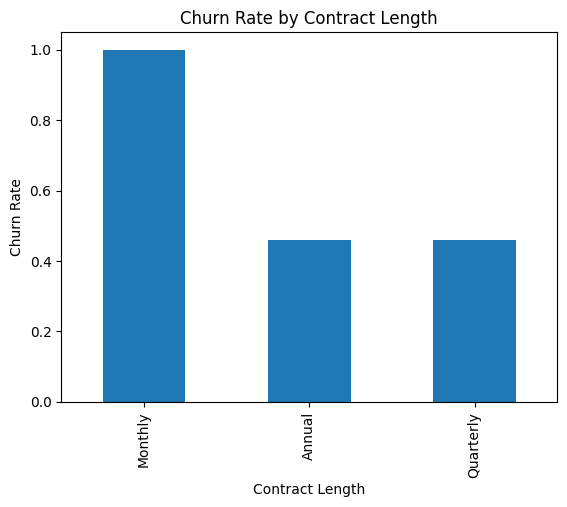

In [17]:
churn_by_contract = train_df.groupby('Contract Length')['Churn'].mean()
churn_by_contract = churn_by_contract.sort_values(ascending=False)
churn_by_contract.plot(kind='bar')
plt.title("Churn Rate by Contract Length")
plt.ylabel("Churn Rate")
plt.xlabel("Contract Length")
plt.show()

### Step 3.5 Tenure / Age Buckets vs Churn

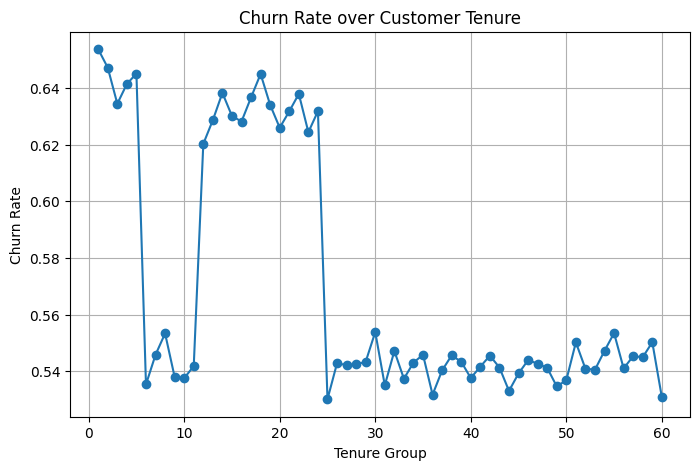

In [18]:
tenure_churn = train_df.groupby('Tenure')['Churn'].mean().sort_index()
plt.figure(figsize=(8,5))
tenure_churn.plot(kind='line', marker='o')
plt.title("Churn Rate over Customer Tenure")
plt.xlabel("Tenure Group")
plt.ylabel("Churn Rate")
plt.grid()
plt.show()

## Step 4 - Feature Engineering

### Step 4.1 - Transform Categorical Variables

In [19]:
category_cols = ['Gender', 'Subscription Type', 'Contract Length']

train_df = pd.get_dummies(train_df, columns = category_cols, drop_first = True)
test_df = pd.get_dummies(test_df, columns = category_cols, drop_first = True)

train_df, test_df = train_df.align(test_df, join = 'left', axis = 1, fill_value = 0)

In [20]:
train_df.head()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Gender_Male,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Monthly,Contract Length_Quarterly
0,2.0,30.0,39.0,14.0,5.0,18.0,932.0,17.0,1.0,False,False,True,False,False
1,3.0,65.0,49.0,1.0,10.0,8.0,557.0,6.0,1.0,False,False,False,True,False
2,4.0,55.0,14.0,4.0,6.0,18.0,185.0,3.0,1.0,False,False,False,False,True
3,5.0,58.0,38.0,21.0,7.0,7.0,396.0,29.0,1.0,True,False,True,True,False
4,6.0,23.0,32.0,20.0,5.0,8.0,617.0,20.0,1.0,True,False,False,True,False


### Step 4.2 - Feature and Target Split

In [21]:
X = train_df.drop(['Churn', 'CustomerID'], axis = 1)
y = train_df['Churn']

In [22]:
X.head()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Gender_Male,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Monthly,Contract Length_Quarterly
0,30.0,39.0,14.0,5.0,18.0,932.0,17.0,False,False,True,False,False
1,65.0,49.0,1.0,10.0,8.0,557.0,6.0,False,False,False,True,False
2,55.0,14.0,4.0,6.0,18.0,185.0,3.0,False,False,False,False,True
3,58.0,38.0,21.0,7.0,7.0,396.0,29.0,True,False,True,True,False
4,23.0,32.0,20.0,5.0,8.0,617.0,20.0,True,False,False,True,False


In [23]:
y

0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
440828    0.0
440829    0.0
440830    0.0
440831    0.0
440832    0.0
Name: Churn, Length: 440833, dtype: float64

### Step 4.3 - Scaling Numerical Features

In [24]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
scaler

,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True


In [26]:
X_scaled

array([[-0.7533263 ,  0.44875958, -0.21051068, ...,  1.39859619,
        -0.4962308 , -0.81725618],
       [ 2.05964592,  1.02827797, -1.7245625 , ..., -0.71500266,
         2.01519132, -0.81725618],
       [ 1.25593957, -1.00003639, -1.37516593, ..., -0.71500266,
        -0.4962308 ,  1.22360653],
       ...,
       [-1.07480884,  0.21695223,  1.30354113, ...,  1.39859619,
        -0.4962308 ,  1.22360653],
       [-0.91406757,  1.37598901, -0.21051068, ...,  1.39859619,
        -0.4962308 ,  1.22360653],
       [-0.67295566,  0.97032613,  0.48828246, ..., -0.71500266,
        -0.4962308 ,  1.22360653]], shape=(440833, 12))

## Step 5 - Train–Validation Split

In [27]:
mask = ~np.isnan(y)

X_scaled = X_scaled[mask]
y = y[mask]

In [28]:
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

## Step 6 - Modeling

### Step 6.1 - Logistic Regression

In [29]:
imputer = SimpleImputer(strategy='mean')  

X_train = imputer.fit_transform(X_train)
X_val = imputer.transform(X_val)

In [30]:
lr = LogisticRegression(max_iter = 1000)
lr.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [31]:
lr_pred = lr.predict(X_val)
print(classification_report(y_val, lr_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88     38167
         1.0       0.92      0.89      0.90     50000

    accuracy                           0.89     88167
   macro avg       0.89      0.89      0.89     88167
weighted avg       0.89      0.89      0.89     88167



In [32]:
lr_pred = lr.predict_proba(X_val)[:, 1]
print("ROC-AUC: ", roc_auc_score(y_val, lr_pred))

ROC-AUC:  0.95902586422826


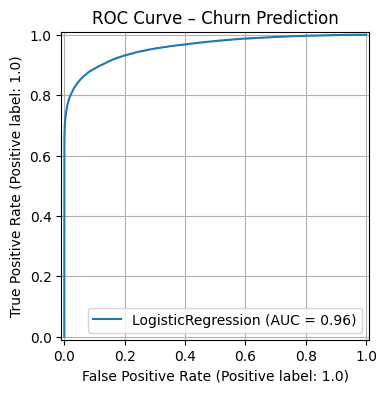

In [35]:
fig, ax = plt.subplots(figsize=(5, 4))
RocCurveDisplay.from_estimator(lr, X_val, y_val, ax=ax)
ax.set_title("ROC Curve – Churn Prediction")
ax.grid()
plt.show()
plt.close(fig)

### Confusion Matrix for Logistic Regression

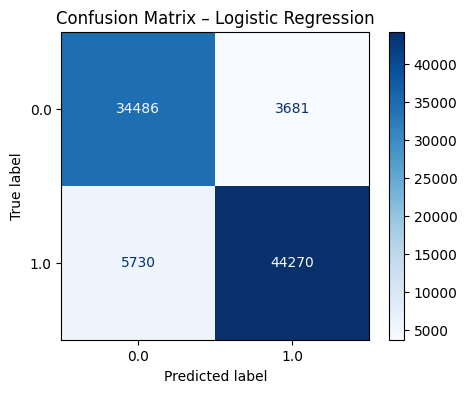

In [36]:
fig, ax = plt.subplots(figsize=(5,4))
ConfusionMatrixDisplay.from_estimator(lr, X_val, y_val, cmap="Blues", values_format="d", ax=ax)
plt.title("Confusion Matrix – Logistic Regression")
plt.show()
plt.close(fig)

### Step 6.2 - Random Forest

In [37]:
rf = RandomForestClassifier(n_estimators = 100, max_depth = 10, n_jobs=-1, random_state = 42)
rf.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",10
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y

In [38]:
preds = rf.predict(X_val)
probs = rf.predict_proba(X_val)[:, 1]

In [39]:
rf_preds = rf.predict(X_val)
print(classification_report(y_val, rf_preds))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     38167
         1.0       1.00      0.98      0.99     50000

    accuracy                           0.99     88167
   macro avg       0.99      0.99      0.99     88167
weighted avg       0.99      0.99      0.99     88167



In [40]:
rf_probs = rf.predict_proba(X_val)[:, 1]
print("ROC-AUC:", roc_auc_score(y_val, rf_probs))

ROC-AUC: 0.9998915628684465


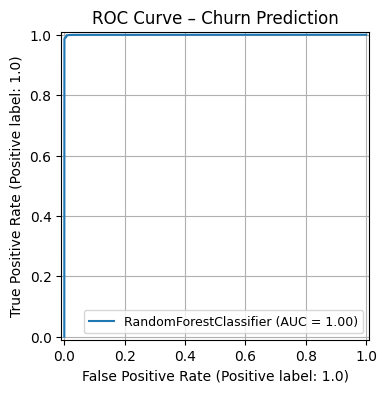

In [45]:
fig, ax = plt.subplots(figsize=(5,4))
RocCurveDisplay.from_estimator(rf, X_val, y_val, ax=ax)
plt.title("ROC Curve – Churn Prediction")
ax.legend(loc="lower right", fontsize=9, frameon=True)
plt.grid()
plt.show()
plt.close(fig)

### Confusion Matrix for Random Forest

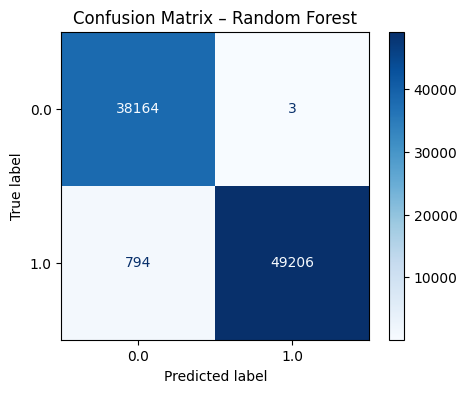

In [46]:
fig, ax = plt.subplots(figsize=(5,4))
ConfusionMatrixDisplay.from_estimator(rf, X_val, y_val, cmap="Blues", values_format="d", ax=ax)
plt.title("Confusion Matrix – Random Forest")
plt.show()
plt.close()

## Step 7 - Feature Importance(Churn Drivers)

In [47]:
feature_imp = pd.Series(rf.feature_importances_, index = X.columns).sort_values(ascending = False)
print("Top 5 Churn Drivers ")
feature_imp.head(5)

Top 5 Churn Drivers 


Support Calls              0.300887
Total Spend                0.225639
Contract Length_Monthly    0.141474
Age                        0.131035
Payment Delay              0.122130
dtype: float64

## Step 8 - Evaluation on Test Dataset

In [48]:
X_test = test_df.drop(['Churn', 'CustomerID'], axis = 1)

In [49]:
X_test

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Gender_Male,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Monthly,Contract Length_Quarterly
0,22,25,14,4,27,598,9,False,False,False,True,False
1,41,28,28,7,13,584,20,False,False,True,True,False
2,47,27,10,2,29,757,21,True,True,False,False,False
3,35,9,12,5,17,232,18,True,True,False,False,True
4,53,58,24,9,2,533,18,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
64369,45,33,12,6,21,947,14,False,False,False,False,True
64370,37,6,1,5,22,923,9,True,False,True,False,False
64371,25,39,14,8,30,327,20,True,True,False,True,False
64372,50,18,19,7,22,540,13,False,False,True,True,False


In [50]:
X_test_scaled = scaler.transform(X_test)

In [51]:
X_test_scaled

array([[-1.39629137, -0.36256616, -0.21051068, ..., -0.71500266,
         2.01519132, -0.81725618],
       [ 0.13075069, -0.18871064,  1.42000665, ...,  1.39859619,
         2.01519132, -0.81725618],
       [ 0.6129745 , -0.24666248, -0.67637278, ..., -0.71500266,
        -0.4962308 , -0.81725618],
       ...,
       [-1.15517947,  0.44875958, -0.21051068, ..., -0.71500266,
         2.01519132, -0.81725618],
       [ 0.8540864 , -0.76822903,  0.37181694, ...,  1.39859619,
         2.01519132, -0.81725618],
       [ 1.01482767,  0.79647062, -0.09404516, ...,  1.39859619,
         2.01519132, -0.81725618]], shape=(64374, 12))

In [52]:
test_probs = rf.predict_proba(X_test_scaled)[:,1]

In [53]:
roc_auc_score(test_df['Churn'], test_probs)

0.7217646282253871

## Step 9 - Business Interpretation & Actions

### Key Findings
* New customers churn more frequently
* High support calls indicate dissatisfaction
* Monthly contracts are riskier
* Payment delays strongly predict churn

### Business Actions
* Retention offers for low-tenure customers
* Proactive outreach to high-support-call users
* Incentives for annual contracts
* ML-driven churn risk alerts

## Project Discussion & Key Questions

#### 1. What was the objective of the churn project?
#### The aim was to predict customers likely to churn and identify key factors driving churn so the business could take proactive retention actions instead of reacting after customers leave.

#### 2. Why was ROC-AUC chosen over accuracy?
#### The churn dataset is imbalanced, and ROC-AUC provides a better measure of the model’s ability to distinguish churned and retained customers across all thresholds.

#### 3. Why was Random Forest selected as the final model?
#### Random Forest captured non-linear patterns and feature interactions better than Logistic Regression, resulting in improved recall and ROC-AUC.

#### 4. How can the business use this model?
#### The model enables proactive customer retention by identifying high-risk customers and allowing targeted interventions.

#### 5. How did EDA help me in this project?
#### EDA helped to identify class imbalance, understand feature distributions, and discover that tenure, support calls, and payment delays were strongly related to churn, which guided feature engineering and model selection.

#### 6. What were the main drivers of churn?
#### Support Calls, Total Spend, Contract Length_Monthly, Age, and Payment Delay were identified as the most influential features.

#### 7. Which tenure groups are most likely to churn?
#### Early-tenure customers show the highest churn.

#### 8. How does churn risk change as customers mature over time?
#### Churn decreases as tenure increases.